Mohammad Faham  Khan

khanfaham2005@gmail.com

ID no : PCP IIT I C8 2436

In [ ]:
#  Step :1
# installing all the libraries we need
# using --pre because normal prophet breaks in python 3.12
!pip install prophet --pre --upgrade
!pip install plotly


In [ ]:
# Step 2
# importing all the important libraries for this project

import pandas as pd
import numpy as np
import plotly.express as px
from prophet import Prophet   # this is for prediction



In [ ]:
data = pd.read_csv("covid_19_clean_complete.csv")
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
# Step 3

# Cleaning the Data

data["Date"] = pd.to_datetime(data["Date"])
data = data.sort_values("Date")
data = data.fillna(0)   # idk if correct but works
data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
166,Sint Maarten,Netherlands,18.042500,-63.054800,2020-01-22,0,0,0,0,Europe
167,0,Netherlands,52.132600,5.291300,2020-01-22,0,0,0,0,Europe
168,0,New Zealand,-40.900600,174.886000,2020-01-22,0,0,0,0,Western Pacific
169,0,Nicaragua,12.865416,-85.207229,2020-01-22,0,0,0,0,Americas


In [ ]:
# Step4
# Grouping everything together

global_stats = data.groupby("Date")[["Confirmed","Deaths","Recovered"]].sum().reset_index()

px.line(global_stats, x="Date", y="Confirmed", title="Worldwide Confirmed Cases")


In [ ]:
# Plotting total global deaths and recovered cases to compare the trends
px.line(global_stats, x="Date", y=["Deaths","Recovered"],
        title="Worldwide Deaths vs Recovered Cases")


In [ ]:
# Step5
# Selecting only the Date and Confirmed columns for prediction

# Prophet requires 'ds' as the date column and 'y' as the value column
p_data = global_stats[["Date", "Confirmed"]]

# Renaming columns according to Prophet requirements
p_data = p_data.rename(columns={"Date":"ds", "Confirmed":"y"})

# Displaying the last few rows to confirm correct format
p_data.tail()


,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:
# Step6

# Creating a Prophet model object
model = Prophet()

# Fitting (training) the Prophet model using the prepared dataset
model.fit(p_data)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8dh15qdu/irwrtsf2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8dh15qdu/3sh6yur1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34074', 'data', 'file=/tmp/tmp8dh15qdu/irwrtsf2.json', 'init=/tmp/tmp8dh15qdu/3sh6yur1.json', 'output', 'file=/tmp/tmp8dh15qdu/prophet_modelrtw95tn_/prophet_model-20251116070245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:02:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:02:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Step7

# choosing the columns needed for prediction
# prophet wants the date column named 'ds' and the target column as 'y'
p_data = global_stats[["Date", "Confirmed"]]

# renaming columns to match prophet requirements
p_data = p_data.rename(columns={"Date":"ds", "Confirmed":"y"})

# showing last few rows
p_data.tail()


,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:
#  Step 8

# making the prophet model object (this is the forecasting model)
model = Prophet()

# training the model on our covid data
model.fit(p_data)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8dh15qdu/uf_ofr59.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8dh15qdu/lbrkp7s0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20921', 'data', 'file=/tmp/tmp8dh15qdu/uf_ofr59.json', 'init=/tmp/tmp8dh15qdu/lbrkp7s0.json', 'output', 'file=/tmp/tmp8dh15qdu/prophet_modelqd4pzecz/prophet_model-20251116070245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:02:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:02:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Step 9

# creating future dates for the next 7 days
future_dates = model.make_future_dataframe(periods=7)

# predicting using the trained model
forecast = model.predict(future_dates)

# showing last few predicted values
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
190,2020-07-30,1.674503e+07,1.664478e+07,1.684429e+07,1.674026e+07,1.675139e+07,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,0.0,0.0,0.0,1.674392e+07
191,2020-07-31,1.694902e+07,1.685146e+07,1.706827e+07,1.693826e+07,1.696312e+07,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,0.0,0.0,0.0,1.695911e+07
192,2020-08-01,1.715301e+07,1.705799e+07,1.728201e+07,1.713544e+07,1.717400e+07,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,0.0,0.0,0.0,1.716677e+07
193,2020-08-02,1.735701e+07,1.725717e+07,1.747886e+07,1.733048e+07,1.738974e+07,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,0.0,0.0,0.0,1.736430e+07
194,2020-08-03,1.756100e+07,1.744542e+07,1.768127e+07,1.752689e+07,1.760371e+07,-2102.755455,-2102.755455,-2102.755455,-2102.755455,-2102.755455,-2102.755455,0.0,0.0,0.0,1.755889e+07


/usr/local/lib/python3.12/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.12/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



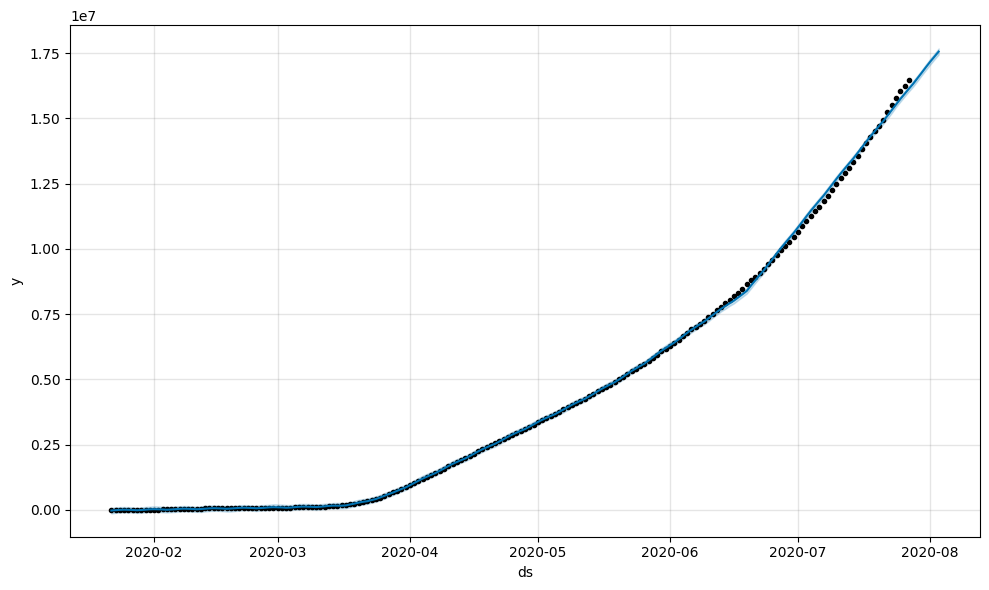

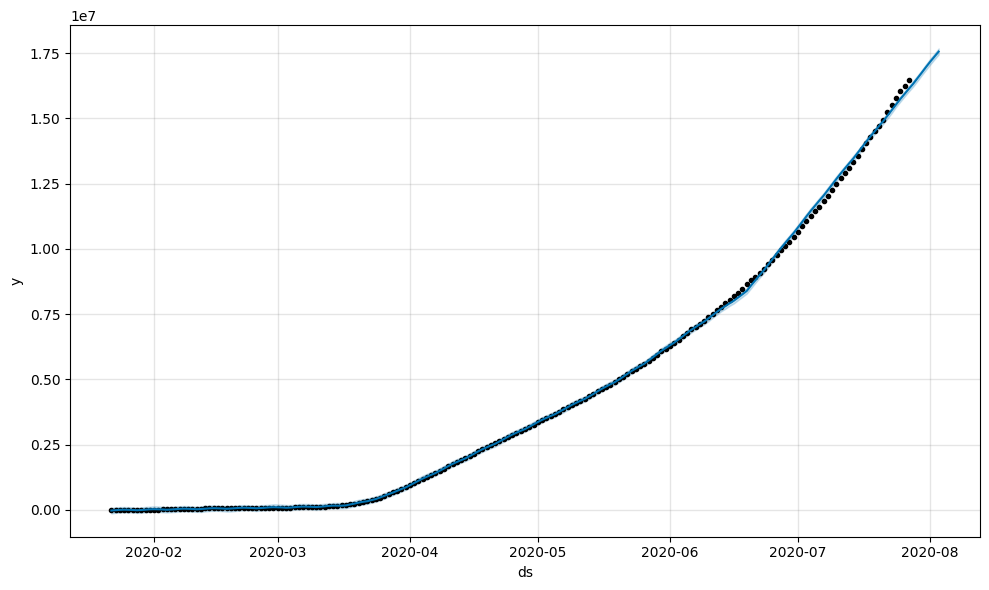

In [ ]:
# Step 10

# simple built-in plot of prophet showing actual + predicted values
model.plot(forecast)


In [ ]:
# Step 11

# merging our real confirmed cases with the predicted values to compare clearly
merged = pd.merge(p_data, forecast[["ds","yhat"]], on="ds", how="left")

# plotting real vs predicted
px.line(merged, x="ds", y=["y","yhat"],
        title="Actual vs Predicted COVID-19 Confirmed Cases")


In [ ]:
# Step 12

# filtering only rows where the country is India
india = data[data["Country/Region"] == "India"]

# grouping date-wise totals for India
india_stats = india.groupby("Date")[["Confirmed","Deaths","Recovered"]].sum().reset_index()

# plotting confirmed cases in India
px.line(india_stats, x="Date", y="Confirmed",
        title="COVID-19 Confirmed Cases in India")
